# **Project: MNIST Digit Classifier**
Deep Learning Project: Handwritten Digit Classifier (MNIST).
[Github](https://github.com/Aronno1920/Digit-Classifier-MNIST) <br/>

Submited By: *Selim Ahmed*<br/>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Best epochs number using EarlyStopping & ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Load the Dataset

In [ ]:
# Load dataset
data = mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Exploratory Data Analysis (EDA)

In [ ]:
print("Type of Dataset -> ", type(data))

print("\nTraining data shape -> ", x_train.shape)
print("Test data shape -> ", x_test.shape)

print(f"\nPixel value range before normalization -> Min: {x_train.min()}, Max: {x_train.max()}")
print(f"Mean and std of training set images -> Mean: {x_train.mean()}, Std Dev: {x_train.std()}")

Type of Dataset ->  <class 'tuple'>

Training data shape ->  (60000, 28, 28)
Test data shape ->  (10000, 28, 28)

Pixel value range before normalization -> Min: 0, Max: 255
Mean and std of training set images -> Mean: 33.318421449829934, Std Dev: 78.56748998339798


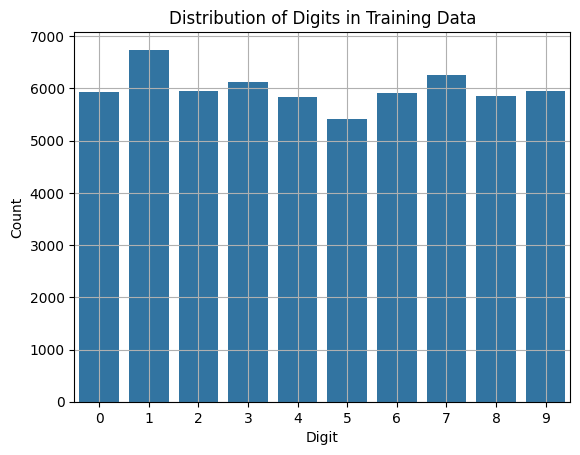

In [ ]:
# Convert labels to DataFrame for plotting
label_df = pd.DataFrame({'label': y_train})

sns.countplot(x='label', data=label_df)
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.grid(True)
plt.show()


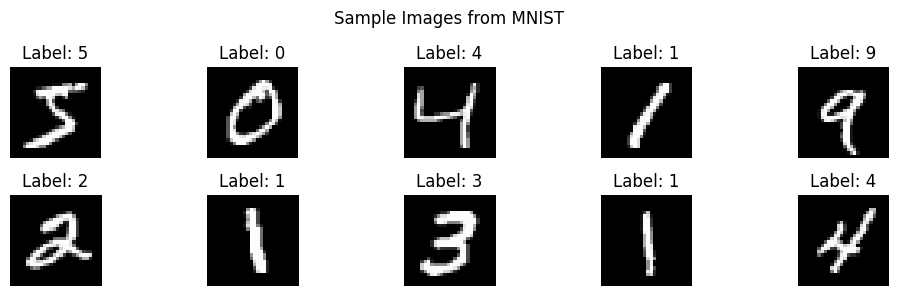

In [ ]:
# Plot 15 sample digits from training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Images from MNIST", y=1.05)
plt.show()

## Normalization Processing

In [ ]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the 28x28 images to 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model Architecture

In [ ]:
model = Sequential([
    Input(shape=(784,)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,506 (2.18 MB)

 Trainable params: 568,970 (2.17 MB)

 Non-trainable params: 1,536 (6.00 KB)

## Training

### Use EarlyStopping - Find best number of epochs

You can dynamically find the best number of epochs using EarlyStopping. This technique:
*   Monitors validation loss or accuracy
*   Stops training automatically when performance stops improving
*   Optionally restores the best weights







In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

#### Common Approach - Train the model
# history = model.fit(
#     x_train, y_train,
#     epochs=19,
#     batch_size=128,
#     validation_split=0.2,
#     verbose=2
# )


### Better Approach - Train the model with EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, model_checkpoint],
    verbose=2
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.12841, saving model to best_model.keras
375/375 - 10s - 28ms/step - accuracy: 0.8968 - loss: 0.3385 - val_accuracy: 0.9610 - val_loss: 0.1284
Epoch 2/50

Epoch 2: val_loss improved from 0.12841 to 0.11986, saving model to best_model.keras
375/375 - 9s - 23ms/step - accuracy: 0.9512 - loss: 0.1581 - val_accuracy: 0.9638 - val_loss: 0.1199
Epoch 3/50

Epoch 3: val_loss improved from 0.11986 to 0.09645, saving model to best_model.keras
375/375 - 9s - 25ms/step - accuracy: 0.9622 - loss: 0.1206 - val_accuracy: 0.9710 - val_loss: 0.0964
Epoch 4/50

Epoch 4: val_loss improved from 0.09645 to 0.09348, saving model to best_model.keras
375/375 - 10s - 27ms/step - accuracy: 0.9686 - loss: 0.0999 - val_accuracy: 0.9719 - val_loss: 0.0935
Epoch 5/50

Epoch 5: val_loss improved from 0.09348 to 0.08576, saving model to best_model.keras
375/375 - 10s - 27ms/step - accuracy: 0.9715 - loss: 0.0928 - val_accuracy: 0.9745 - val_loss: 0.0858
Epoch 6/50


In [ ]:
best_model = load_model('best_model.keras')

best_epoch = np.argmin(history.history['val_loss']) + 1
print(f"Best Epoch -> ", best_epoch)

Best Epoch ->  14


## Visualization

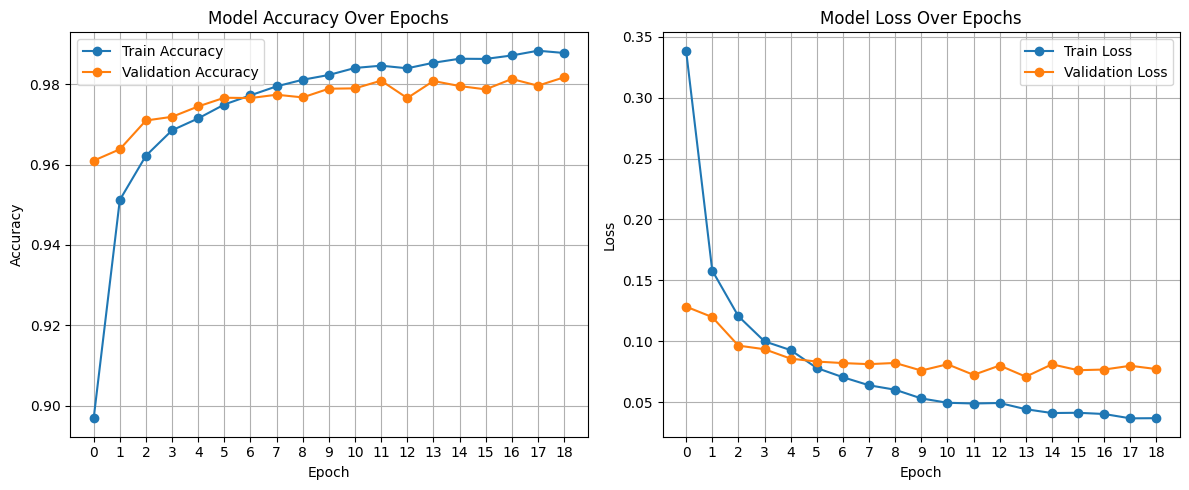

In [ ]:
plt.figure(figsize=(12, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(len(history.history['accuracy'])))
plt.legend()
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(len(history.history['loss'])))
plt.legend()
plt.grid(True)


# Show both plots
plt.tight_layout()
plt.show()

## Evaluation

In [ ]:
def show_predictions(num_samples=10):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Final Test Accuracy --> {test_acc:.4f}")

    # Calculate grid layout
    cols = min(5, num_samples)
    rows = (num_samples + cols - 1) // cols

    # Create figure
    plt.figure(figsize=(3 * cols, 3 * rows))

    import random
    for i in range(num_samples):
        index = random.randint(0, len(x_test) - 1)
        sample = x_test[index].reshape(1, -1)
        prediction = model.predict(sample, verbose=0)
        predicted_label = np.argmax(prediction)
        true_label = np.argmax(y_test[index])

        plt.subplot(rows, cols, i + 1)
        plt.imshow(sample.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
        plt.axis('off')

    plt.suptitle(f"{num_samples} Sample Predictions on Test Data", fontsize=16)
    plt.tight_layout()
    plt.show()

Final Test Accuracy --> 0.9828


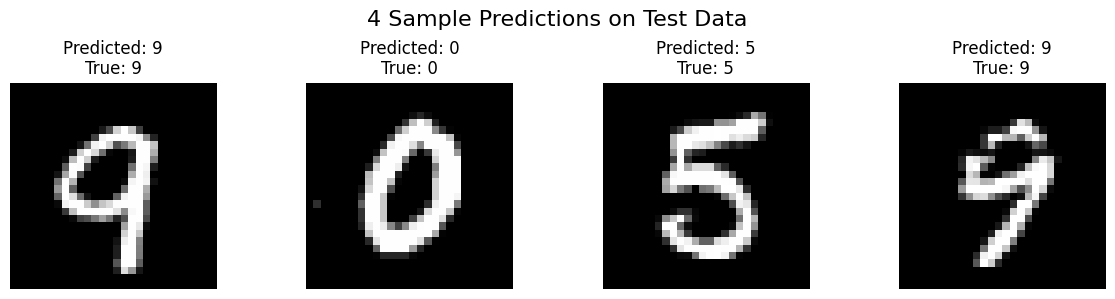

In [ ]:
show_predictions(4)